In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from math import pi

In [215]:
sample_n = 101
def si_to_ori(si, orientation):
    ori_zero = (1. - 2. * si / (sample_n - 1)) * pi
    print(ori_zero)
    return (orientation + ori_zero) % (2*pi)

In [216]:
round_angle = 2*pi
def ori_to_si(ori, orientation):
    ori_zero = (ori - orientation) % round_angle
    return round((1. - ori_zero / pi) * (sample_n - 1.) / 2.) % sample_n

In [220]:
def get_min_distance(deg1, deg2):
    dis = (deg1 - deg2) % round_angle
    return min(dis, round_angle - dis)

In [224]:
target = 2.315875516178086
get_min_distance(3.56493651789, (target-pi/2)%(2*pi))

2.8198573285068105

In [225]:
get_min_distance(3.56493651789, (target+pi/2)%(2*pi))

0.3217353250829831

In [229]:
get_min_distance(1.068197138546323, 3)

1.9831853071795864

In [217]:
si_to_ori(51, 3.69212265357)

-0.06283185307179592


3.629290800498204

In [218]:
ori_to_si(si_to_ori(51, 3.69212265357), 3.69212265357)

-0.06283185307179592
6.220353454107791


52

In [219]:
1- (-0.06283185307179592)/pi

1.02

In [213]:
for i in range(101):
    ori = si_to_ori(i, 3.69212265357)
    print(i, ori, ori_to_si(ori, 3.69212265357))

0 0.5505299999802062 0
1 0.48769814690841073 1
2 0.4248662938366152 2
3 0.36203444076481883 3
4 0.2992025876930233 4
5 0.23637073462122693 5
6 0.17353888154943142 6
7 0.11070702847763592 7
8 0.04787517540583952 8
9 6.26822862951363 9
10 6.205396776441834 10
11 6.142564923370038 11
12 6.079733070298243 12
13 6.016901217226447 13
14 5.954069364154651 14
15 5.8912375110828545 15
16 5.828405658011059 16
17 5.7655738049392635 17
18 5.702741951867468 18
19 5.639910098795672 19
20 5.577078245723875 20
21 5.51424639265208 21
22 5.451414539580284 22
23 5.388582686508489 23
24 5.325750833436692 24
25 5.262918980364896 25
26 5.2000871272931 26
27 5.137255274221305 27
28 5.0744234211495085 28
29 5.011591568077713 29
30 4.948759715005917 30
31 4.885927861934121 31
32 4.823096008862326 32
33 4.760264155790529 33
34 4.697432302718734 34
35 4.634600449646938 35
36 4.571768596575142 36
37 4.508936743503346 37
38 4.44610489043155 38
39 4.383273037359754 39
40 4.320441184287958 40
41 4.2576093312161625 4

In [93]:
def moving_average(arr, mean_window):
    mean_ranges = []
    sample_n = len(arr)
    for i in range(sample_n):
        s_sum = 0
        for j in range(mean_window):
            cal_i = (i - int(mean_window / 2) + j) % sample_n
            s_sum += arr[cal_i]
        mean_ranges.append(s_sum / mean_window)
    return mean_ranges

In [189]:
sample_n = 41
shortest_road = 3

quarter_lsi = int((sample_n - 1) / 4)
back_i = 0
right_i = quarter_lsi
front_i = quarter_lsi * 2
left_i = quarter_lsi * 3
right_back_i = int((sample_n - 1) * 1 / 8)
right_front_i = int((sample_n - 1) * 3 / 8)
left_front_i = int((sample_n - 1) * 5 / 8)
left_back_i = int((sample_n - 1) * 7 / 8)

def update_sensor_data_analysis(arr):
    arr = moving_average(arr, int(sample_n / 8))

    max_sensor_arr = []
    msa_front = []

    for i in range(sample_n):
        curr_s = arr[i]
        prev_s = arr[i - 1]
        next_s = arr[(i + 1) % sample_n]

        if curr_s > prev_s and curr_s >= next_s and curr_s >= shortest_road:
            max_sensor_arr.append(i)
            if i >= right_i and i <= left_i:
                msa_front.append(i)
                
    return max_sensor_arr, msa_front

In [2]:
data_files = ["183625.record_start","221329.record","221437.record_corner","221551.record_corner",
             "221739.record","221812.record_corner"]

In [190]:
for df in data_files:
    dt = np.genfromtxt(df, delimiter=",")
    for i in range(dt.shape[0]):
        print(df, i, dt[i,0], update_sensor_data_analysis(dt[i,1:]))

183625.record_start 0 7.48346222026536e-05 ([21], [21])
183625.record_start 1 7.48346222026536e-05 ([21], [21])
183625.record_start 2 7.684936438585131e-05 ([21], [21])
183625.record_start 3 0.008476410059708043 ([21], [21])
183625.record_start 4 0.036808457518523 ([21], [21])
183625.record_start 5 0.08341139844918002 ([21], [21])
183625.record_start 6 0.13343484743288694 ([21], [21])
183625.record_start 7 0.18345828531187558 ([22], [22])
183625.record_start 8 0.2334817168131066 ([22], [22])
183625.record_start 9 0.28350514471709276 ([22], [22])
183625.record_start 10 0.3335285717527048 ([23], [23])
183625.record_start 11 0.3835520004589821 ([23], [23])
183625.record_start 12 0.4335754330591347 ([23], [23])
183625.record_start 13 0.48359887135053986 ([24], [24])
183625.record_start 14 0.5336223166150575 ([24], [24])
183625.record_start 15 0.5836457695534443 ([24], [24])
183625.record_start 16 0.6336692302467001 ([25], [25])
183625.record_start 17 0.6836926981460252 ([25], [25])
183625.

221437.record_corner 57 -1.1904920556568708 ([5, 16, 38], [16])
221437.record_corner 58 -1.1504731797315015 ([6, 17, 38], [17])
221437.record_corner 59 -1.090444871293825 ([6, 17, 39], [17])
221437.record_corner 60 -1.0304165748077654 ([6, 17, 39], [17])
221437.record_corner 61 -0.9903977197039626 ([6, 18, 39], [18])
221437.record_corner 62 -0.9303694539115035 ([7, 18, 40], [18])
221437.record_corner 63 -0.9003553294177818 ([7, 18, 40], [18])
221437.record_corner 64 -0.8403270983927579 ([7, 19, 40], [19])
221437.record_corner 65 -0.8003082912878436 ([0, 8, 19], [19])
221437.record_corner 66 -0.7402801006539126 ([0, 8, 19], [19])
221437.record_corner 67 -0.7002613195551397 ([0, 8, 19], [19])
221437.record_corner 68 -0.6402331649566501 ([1, 9, 20], [20])
221437.record_corner 69 -0.5802050276680598 ([1, 9, 20], [20])
221437.record_corner 70 -0.5401862770247454 ([1, 9, 20], [20])
221437.record_corner 71 -0.4901628448009744 ([2, 10, 21], [10, 21])
221437.record_corner 72 -0.4301347313758055

221551.record_corner 137 -1.1455806931414625 ([2, 23, 32], [23])
221551.record_corner 138 -1.0955572565415301 ([2, 24, 33], [24])
221551.record_corner 139 -1.0555385024063793 ([3, 24, 33], [24])
221551.record_corner 140 -0.9955103621208442 ([3, 24, 33], [24])
221551.record_corner 141 -0.9554915956939506 ([3, 25, 34], [25])
221551.record_corner 142 -0.8954634371942992 ([4, 25, 34], [25])
221551.record_corner 143 -0.8454399647959765 ([4, 25, 34], [25])
221551.record_corner 144 -0.8054211834477885 ([4, 26, 35], [26])
221551.record_corner 145 -0.7453930082524433 ([5, 26, 35], [26])
221551.record_corner 146 -0.7053742245526575 ([5, 26, 35], [26])
221551.record_corner 147 -0.6453460522630056 ([5, 26, 36], [26])
221551.record_corner 148 -0.605327275156964 ([6, 27, 36], [27])
221551.record_corner 149 -0.545299120036945 ([6, 27, 36], [27])
221551.record_corner 150 -0.5052803591949885 ([6, 27, 37], [27])
221551.record_corner 151 -0.45525692100486476 ([7, 28, 37], [28])
221551.record_corner 152 -

221812.record_corner 165 1.6333244619124923 ([6, 16], [16])
221812.record_corner 166 1.6833479368963518 ([7, 16], [16])
221812.record_corner 167 1.7333714048591324 ([7, 17], [17])
221812.record_corner 168 1.7833948627710308 ([7, 17], [17])
221812.record_corner 169 1.8234136199248834 ([8, 17], [17])
221812.record_corner 170 1.8834417372468673 ([8, 18], [18])
221812.record_corner 171 1.9234604682082599 ([8, 18], [18])


In [178]:
dt[0,0]

-2.782369929606632

[]

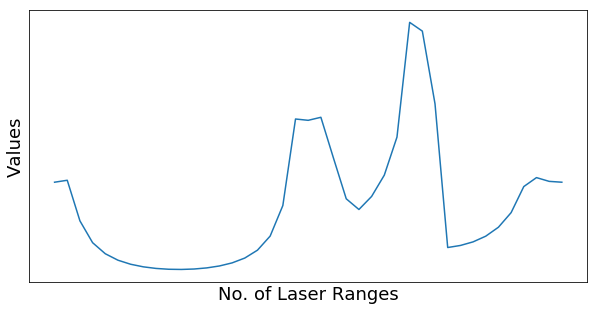

In [18]:
dt = np.genfromtxt(data_files[2], delimiter=",")

fig = plt.figure(figsize=(10, 5))

# plt.plot(moving_average(dt[100,1:], 5))


ax = fig.add_subplot(111)
# ax.set_title('axes title
ax.plot(dt[0,1:])
ax.set_xlabel('No. of Laser Ranges',fontsize=18)
ax.set_ylabel('Values',fontsize=18)

frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])

In [75]:
n = 40
1.5 * (1 - math.sin(2*math.pi/n) / math.sin(4*math.pi/n))

0.7406511556589976

In [68]:
print(1 / math.sin(2*math.pi/40))
print(1 / math.sin(4*math.pi/40))

6.392453221499662
3.23606797749979


In [54]:
dt[0,1:40] - dt[0,2:41]

array([-0.01178199, -0.03699833, -0.06727481, -0.10799944, -0.16914964,
        0.16923761,  0.10820282,  0.06742489,  0.03712839,  0.01191247,
       -0.01177257, -0.03697014, -0.06722403, -0.10791814, -0.16902232,
       -0.27234364, -0.47547936, -0.97930336, -2.98547792, -2.893682  ,
       -0.11089706,  3.54157972, -0.37142992,  3.33649826,  0.43125772,
        0.26756585,  0.17083228,  0.10645139,  0.05861866,  0.01880741,
       -0.01858687, -0.05836952, -0.10613501,  0.0645107 ,  0.27335501,
        0.1695981 ,  0.1082828 ,  0.06747484,  0.03715581])

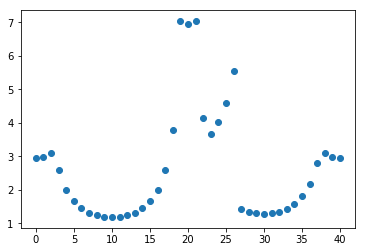

In [77]:
arr = dt[0,1:]
plt.scatter(range(len(arr)),arr)

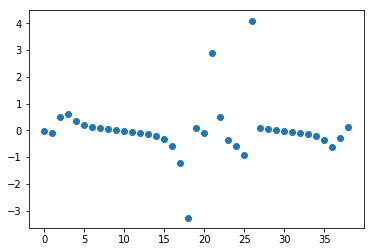

In [78]:
arr = dt[0,1:40] - dt[0,2:41]
plt.scatter(range(len(arr)),arr)

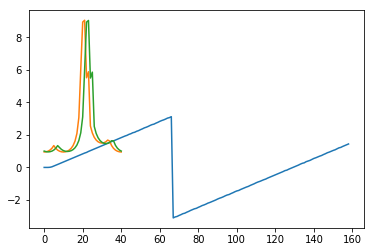

In [53]:
dt = np.genfromtxt("183625.record_start", delimiter=",")

plt.plot(dt[:,0])
plt.plot(dt[0,1:])
plt.plot(dt[10,1:])

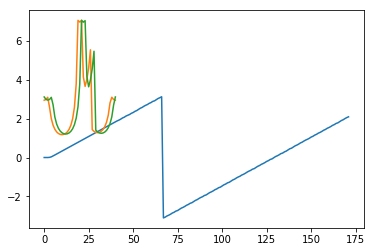

In [120]:
dt = np.genfromtxt("221329.record", delimiter=",")

plt.plot(dt[:,0])
plt.plot(dt[0,1:])
plt.plot(dt[10,1:])

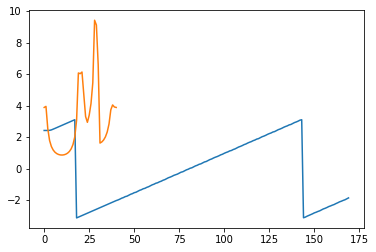

In [38]:
dt = np.genfromtxt("221437.record_corner", delimiter=",")

plt.plot(dt[:,0])
plt.plot(dt[0,1:])
# plt.plot(dt[100,1:])

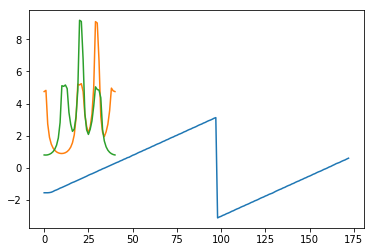

In [36]:
dt = np.genfromtxt("221551.record_corner", delimiter=",")

plt.plot(dt[:,0])
plt.plot(dt[0,1:])
plt.plot(dt[100,1:])

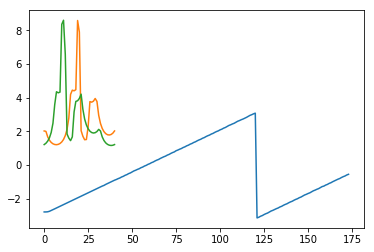

In [37]:
dt = np.genfromtxt("221739.record", delimiter=",")

plt.plot(dt[:,0])
plt.plot(dt[0,1:])
plt.plot(dt[100,1:])

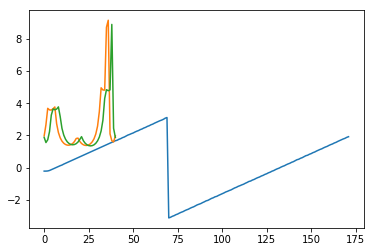

In [34]:
dt = np.genfromtxt("221812.record_corner", delimiter=",")

plt.plot(dt[:,0])
plt.plot(dt[0,1:])
plt.plot(dt[10,1:])

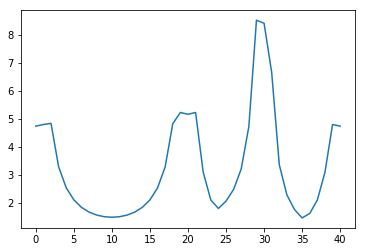

In [91]:
a = [4.738330841064453, 4.797060012817383, 4.838690280914307, 3.2919118404388428, 2.5419275760650635, 2.11263370513916, 1.8462852239608765, 1.6762301921844482, 1.5702636241912842, 1.5119129419326782, 1.493193507194519, 1.5116996765136719, 1.5698093175888062, 1.6754697561264038, 1.8450911045074463, 2.110753297805786, 2.538813829421997, 3.286163806915283, 4.8254475593566895, 5.226377487182617, 5.161670207977295, 5.225644111633301, 3.100522994995117, 2.109384775161743, 1.8061413764953613, 2.0661966800689697, 2.4852235317230225, 3.2168023586273193, 4.723608493804932, 8.512203216552734, 8.406807899475098, 6.656152725219727, 3.364710807800293, 2.289116859436035, 1.7675952911376953, 1.4690746068954468, 1.626821756362915, 2.105710029602051, 3.0920567512512207, 4.797733306884766, 4.738330841064453]
plt.plot(a)

In [94]:
moving_average([1,2,3,4],2)

[2.5, 1.5, 2.5, 3.5]

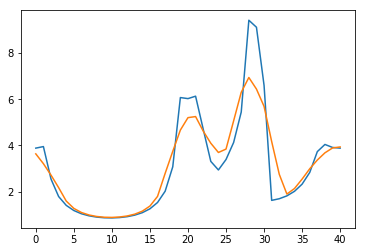

In [105]:
# dt = np.genfromtxt("221329.record", delimiter=",")
dt = np.genfromtxt("221437.record_corner", delimiter=",")

plt.plot(dt[0,1:])
plt.plot(moving_average(dt[0,1:], 5))

In [1]:
import time

In [7]:
N = 100000

start_t = time.time()

a = [str(x) for x in range(100)]
for _ in range(N):
    101 in a
print(time.time() - start_t)

start_t = time.time()
d = {str(x):1 for x in range(100)}
for _ in range(N):
    "101" in d
print(time.time() - start_t)

0.2191450595855713
0.007514476776123047
